## Quick check of missing values in wiki per-article pageview data

In [1]:
import time
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
import heapq

In [2]:
# important window definition
prediction_length = 48
context_length = 72
day = 24
week = 148
month = 720
year = 8760

freq = 'H'

In [3]:
# get the Time Series data and corresponding wiki project name
def get_ts_and_name(data_location,label_location,freq):
    df_ts = pd.read_json(data_location, lines=True)
    num_pt = min(len(df_ts.iloc[1, 1]), 100000)
    print('use first ', num_pt, ' points in a time series')
    num_ts = len(df_ts)

    time_series_wiki = []
    for k in range(num_ts):
        t0 = df_ts.iloc[k, 0]
        data = df_ts.iloc[k, 1][:num_pt]
        index = pd.DatetimeIndex(start=t0, freq=freq, periods=num_pt)
        time_series_wiki.append(pd.Series(data=data, index=index))
        
    with open(label_location) as f:
        wp_list = f.read().splitlines()  
        
    return time_series_wiki, wp_list

# get the Time Series data and corresponding wiki project name
def get_ts(data_location,freq):
    df_ts = pd.read_json(data_location, lines=True)
    num_pt = min(len(df_ts.iloc[1, 1]), 100000)
    print('use first ', num_pt, ' points in a time series')
    num_ts = len(df_ts)

    time_series_wiki = []
    for k in range(num_ts):
        t0 = df_ts.iloc[k, 0]
        data = df_ts.iloc[k, 1][:num_pt]
        index = pd.DatetimeIndex(start=t0, freq=freq, periods=num_pt)
        time_series_wiki.append(pd.Series(data=data, index=index))       
    return time_series_wiki

use first  8737  points in a time series
mean null percentage 0.28678754801620077


(array([547., 188., 166., 114., 131., 125., 107., 117., 117., 106.,  99.,
        103., 117.,  99., 104., 102., 118., 130., 121., 139.]),
 array([0.        , 0.03498913, 0.06997825, 0.10496738, 0.13995651,
        0.17494563, 0.20993476, 0.24492389, 0.27991301, 0.31490214,
        0.34989127, 0.38488039, 0.41986952, 0.45485865, 0.48984777,
        0.5248369 , 0.55982603, 0.59481515, 0.62980428, 0.66479341,
        0.69978253]),
 <a list of 20 Patch objects>)

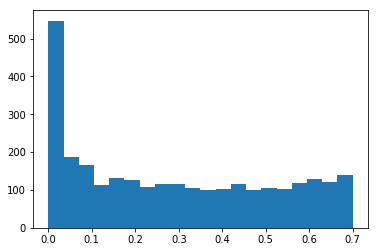

In [4]:
input_file = 'big_train_2018.json'

time_series_wiki = get_ts(input_file,freq)

list_null = []
count = 0
for k in range(len(time_series_wiki)):
    ts = time_series_wiki[k]
    list_null.append(ts.isnull().sum()/len(ts)) 

print('mean null percentage', sum(list_null)/len(list_null))
plt.figure()
plt.hist(list_null, bins = 20)

use first  8737  points in a time series
mean null percentage 0.2725592211740457


(array([646., 195., 137., 142., 134., 126., 108., 115., 123., 124., 111.,
        110., 105., 110., 100., 109., 114., 110., 121., 115.]),
 array([0.        , 0.0349834 , 0.06996681, 0.10495021, 0.13993362,
        0.17491702, 0.20990042, 0.24488383, 0.27986723, 0.31485064,
        0.34983404, 0.38481744, 0.41980085, 0.45478425, 0.48976765,
        0.52475106, 0.55973446, 0.59471787, 0.62970127, 0.66468467,
        0.69966808]),
 <a list of 20 Patch objects>)

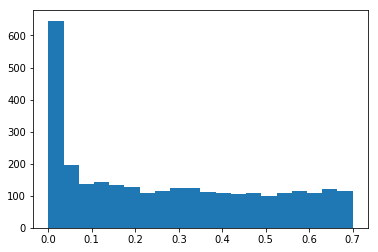

In [5]:
input_file = 'big_train_2017.json'

time_series_wiki = get_ts(input_file,freq)

list_null = []
count = 0
for k in range(len(time_series_wiki)):
    ts = time_series_wiki[k]
    list_null.append(ts.isnull().sum()/len(ts)) 

print('mean null percentage', sum(list_null)/len(list_null))
plt.figure()
plt.hist(list_null, bins = 20)

use first  8761  points in a time series
mean null percentage 0.27756610815104427


(array([627., 184., 160., 136., 139., 128., 119., 115., 103.,  94.,  88.,
        115.,  94.,  91., 119., 107., 116., 115., 135., 137.]),
 array([0.        , 0.03499601, 0.06999201, 0.10498802, 0.13998402,
        0.17498003, 0.20997603, 0.24497204, 0.27996804, 0.31496405,
        0.34996005, 0.38495606, 0.41995206, 0.45494807, 0.48994407,
        0.52494008, 0.55993608, 0.59493209, 0.62992809, 0.6649241 ,
        0.6999201 ]),
 <a list of 20 Patch objects>)

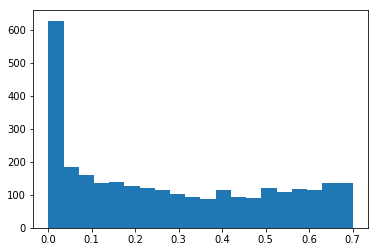

In [6]:
input_file = 'big_train_2016.json'

time_series_wiki = get_ts(input_file,freq)

list_null = []
count = 0
for k in range(len(time_series_wiki)):
    ts = time_series_wiki[k]
    list_null.append(ts.isnull().sum()/len(ts)) 

print('mean null percentage', sum(list_null)/len(list_null))
plt.figure()
plt.hist(list_null, bins = 20)

use first  8737  points in a time series
mean null percentage 0.5037612433868695


(array([96., 32., 25., 26., 26., 17., 20., 23., 25., 17., 24., 25., 29.,
        32., 23., 23., 37., 41., 27., 37.]),
 array([0.32974705, 0.34825455, 0.36676205, 0.38526954, 0.40377704,
        0.42228454, 0.44079203, 0.45929953, 0.47780703, 0.49631452,
        0.51482202, 0.53332952, 0.55183701, 0.57034451, 0.58885201,
        0.60735951, 0.625867  , 0.6443745 , 0.662882  , 0.68138949,
        0.69989699]),
 <a list of 20 Patch objects>)

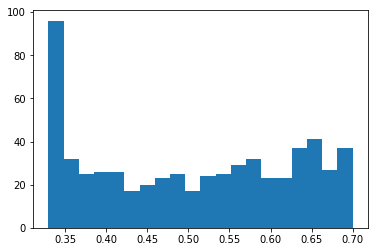

In [7]:
input_file = 'big_train_2015.json'

time_series_wiki = get_ts(input_file,freq)

list_null = []
count = 0
for k in range(len(time_series_wiki)):
    ts = time_series_wiki[k]
    list_null.append(ts.isnull().sum()/len(ts)) 

print('mean null percentage', sum(list_null)/len(list_null))
plt.figure()
plt.hist(list_null, bins = 20)